# Analisis de Datos del Grupo A
### **Universidad de Flores y Universidad de Villa María**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importates del dataset

## Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno.

In [18]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

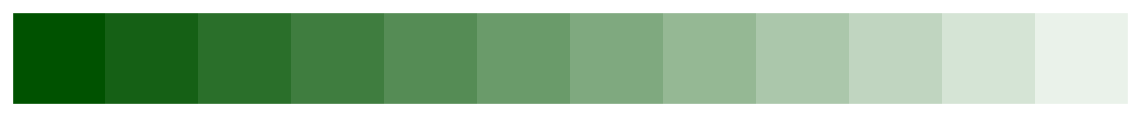

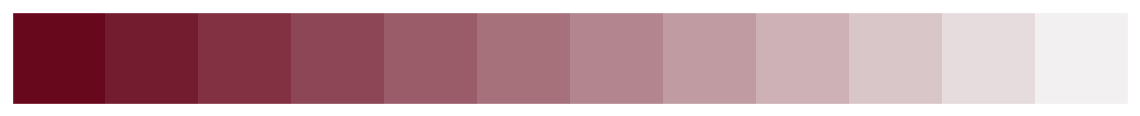

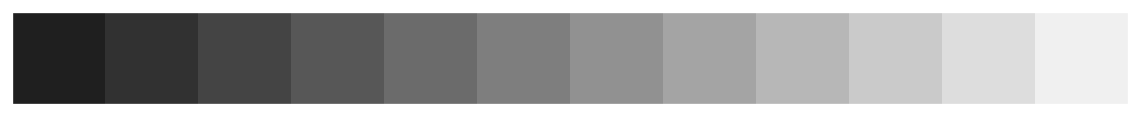

In [19]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False

sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]

sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

### Importaciones de los datos

En esta sección **importamos los datasets transformados** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la **variable geográfica**.

In [20]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoA_flores_universidad'
university1_name = 'Universidad de Flores'

university2 = 'GrupoA_villa_maria_universidad'
university2_name = 'Universidad de Villa María'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep=',')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep=',')


In [43]:
#imprimimos las columnas
df_1.columns 

Index(['Unnamed: 0', 'university', 'career', 'inscription_date', 'first_name',
       'last_name', 'gender', 'age', 'postal_code', 'location', 'email',
       'tipo_career'],
      dtype='object')

In [54]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1819 non-null   int64         
 1   university        1819 non-null   object        
 2   career            1819 non-null   object        
 3   inscription_date  1819 non-null   datetime64[ns]
 4   first_name        1819 non-null   object        
 5   last_name         1819 non-null   object        
 6   gender            1819 non-null   object        
 7   age               1819 non-null   int64         
 8   postal_code       1819 non-null   int64         
 9   location          1819 non-null   object        
 10  email             1819 non-null   object        
 11  tipo_career       1819 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 170.7+ KB


In [57]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1837 non-null   int64         
 1   university        1837 non-null   object        
 2   career            1837 non-null   object        
 3   inscription_date  1837 non-null   datetime64[ns]
 4   first_name        1837 non-null   object        
 5   last_name         1837 non-null   object        
 6   gender            1837 non-null   object        
 7   age               1837 non-null   int64         
 8   postal_code       1837 non-null   int64         
 9   location          1837 non-null   object        
 10  email             1837 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 158.0+ KB


In [76]:
print(f'La cantida de carreras en la {university1_name}es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))

La cantida de carreras en la Universidad de Floreses de: 33
La cantida de carreras en la Universidad de Villa María es de: 33


In [56]:
df_1.describe()

,Unnamed: 0,age,postal_code
count,1819.000000,1819.000000,1819.000000
mean,909.000000,57.790544,4848.899395
std,525.244388,33.651397,2188.210157
min,0.000000,1.000000,1601.000000
25%,454.500000,28.000000,3040.500000
50%,909.000000,58.000000,4648.000000
75%,1363.500000,87.000000,6471.500000
max,1818.000000,116.000000,9421.000000


In [58]:
df_2.describe()

,Unnamed: 0,age,postal_code
count,1837.00000,1837.000000,1837.000000
mean,918.00000,46.321176,4657.583560
std,530.44054,30.391047,2194.681611
min,0.00000,2.000000,1601.000000
25%,459.00000,17.000000,2845.000000
50%,918.00000,45.000000,4145.000000
75%,1377.00000,72.000000,6383.000000
max,1836.00000,102.000000,9421.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica.

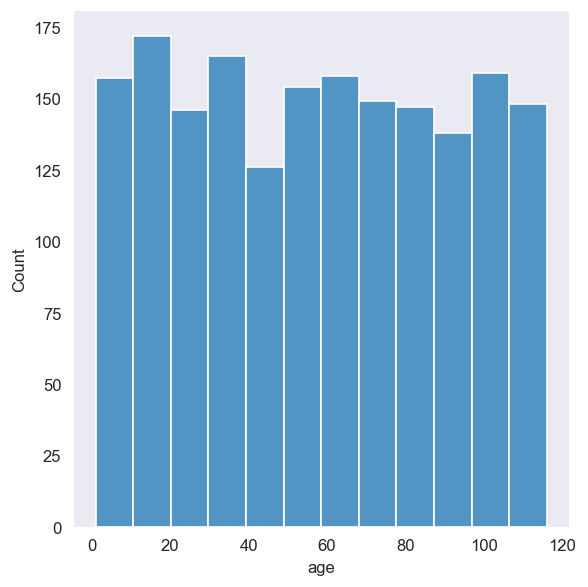

In [79]:
sns.displot(df_1.age)

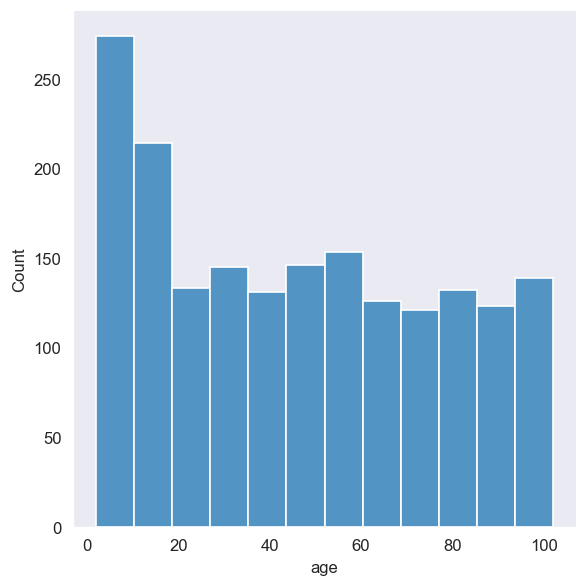

In [80]:
sns.displot(df_2.age)

In [ ]:

df_1 = df_1[df_1.age.between(15,85)]
df_2 = df_2[df_1.age.between(15,85)]

Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [22]:
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None)

In [44]:
df_geonames.head(2)

,country,postal_code,location,region,type,lat,lon,type_2
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,-25.7833,-64.5000,4


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [23]:
df_geonames.dropna(axis=1, inplace=True)

Realizamos la combinacion de los datasets

In [24]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [25]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [45]:
df_1geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,Unnamed: 0,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,6200,REALICO,La Pampa,L,-35.0333,-64.25,4.0,0,universidad de flores,licenciatura en kinesiología y fisiatría,2020-11-01,chelsea,taylor,female,100,realico,michael67@gmail.com
1,AR,1633,EMPALME,Buenos Aires,B,-34.4333,-59.00,4.0,1,universidad de flores,ingeniería en informática,2020-12-09,daniel,brown,male,83,empalme,khodges@gmail.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

## Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

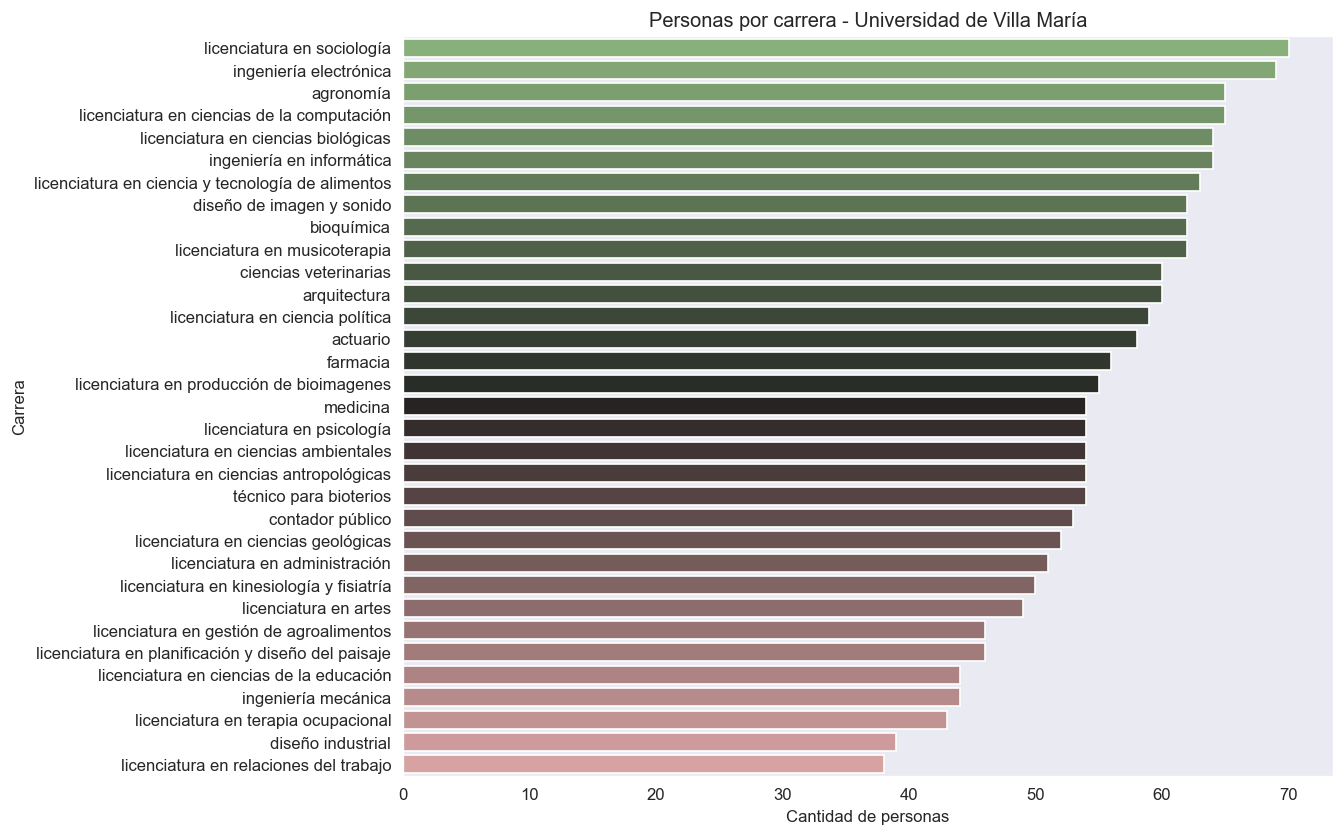

In [48]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

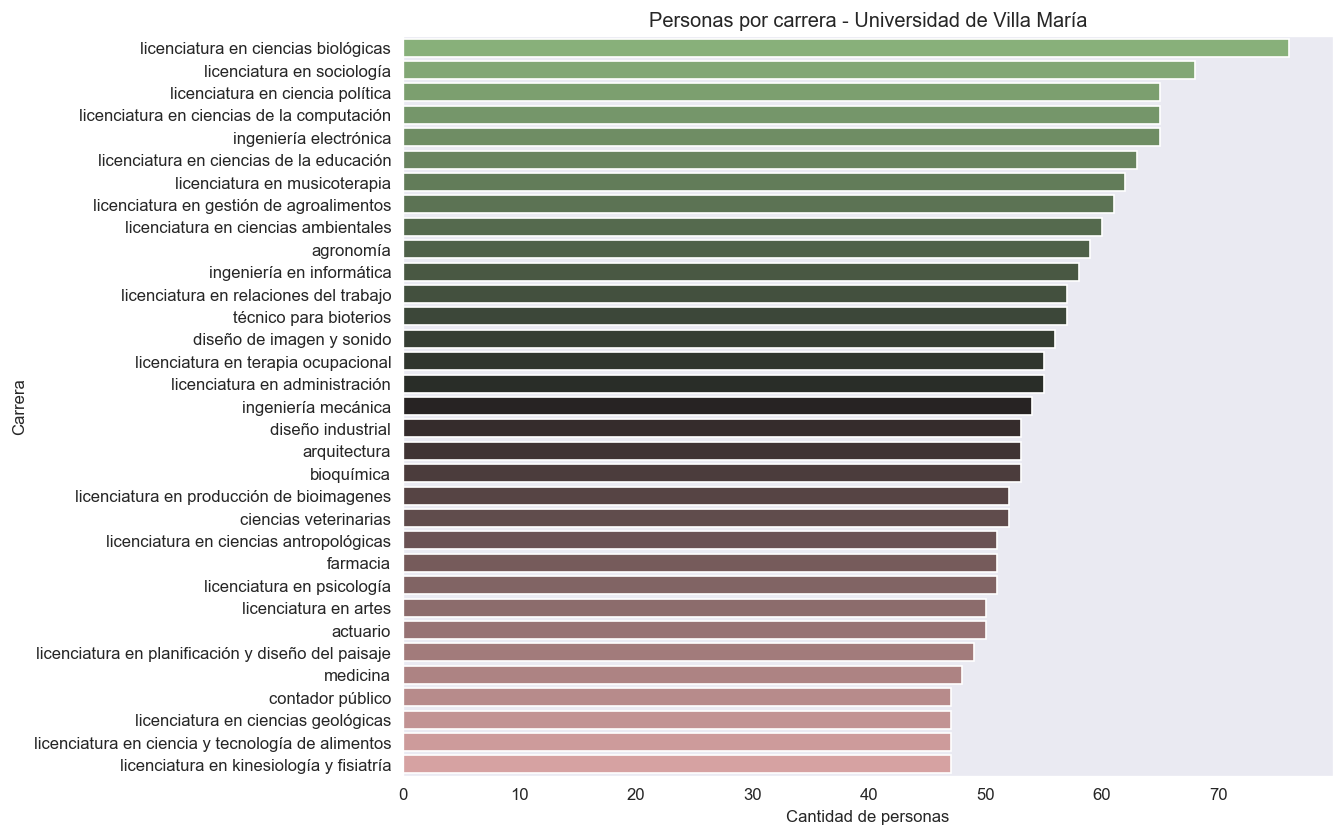

In [46]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

## Top 10 de carreras con más alumnos

C:\Users\julia\AppData\Local\Temp\ipykernel_18464\3717448754.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


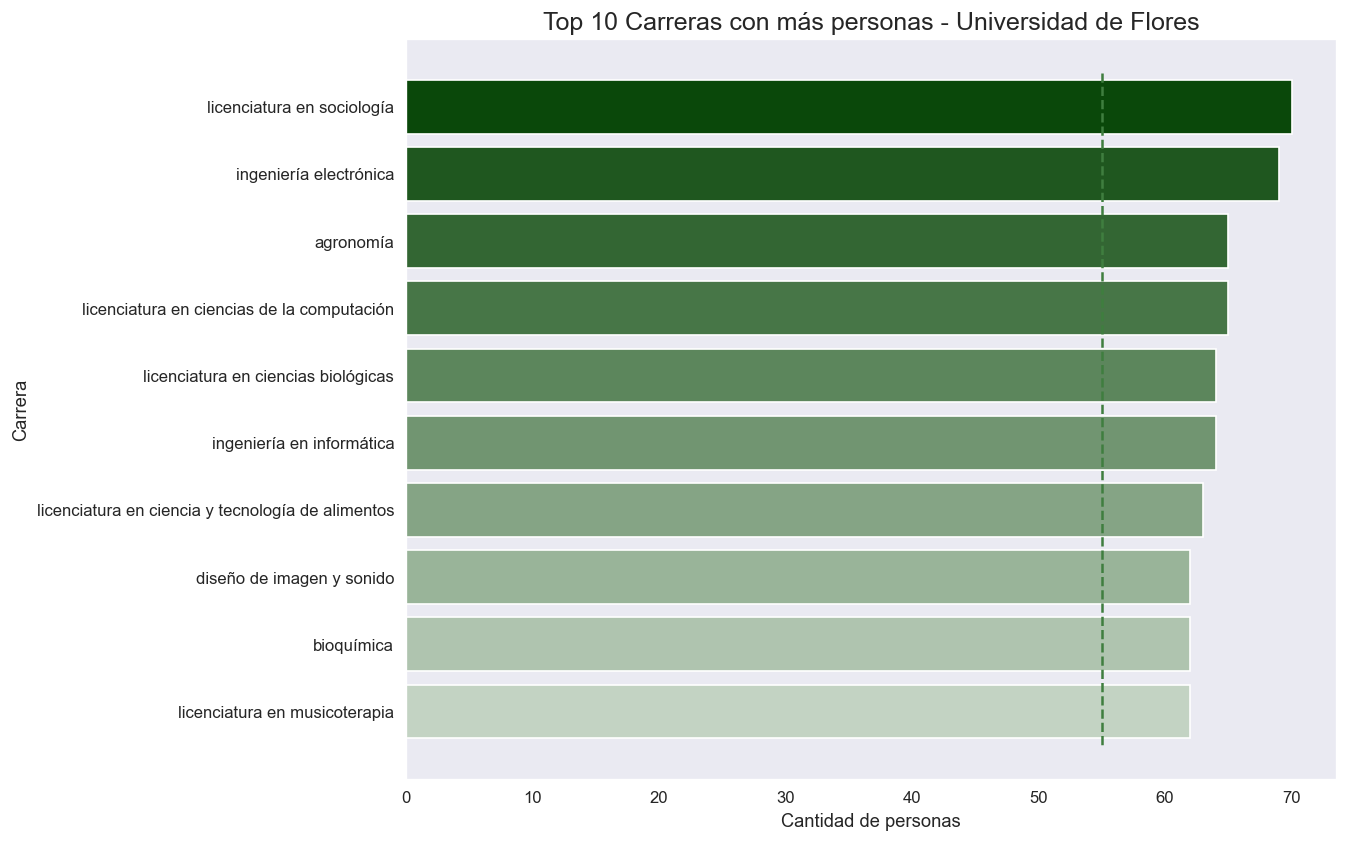

In [26]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_18464\2552539824.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


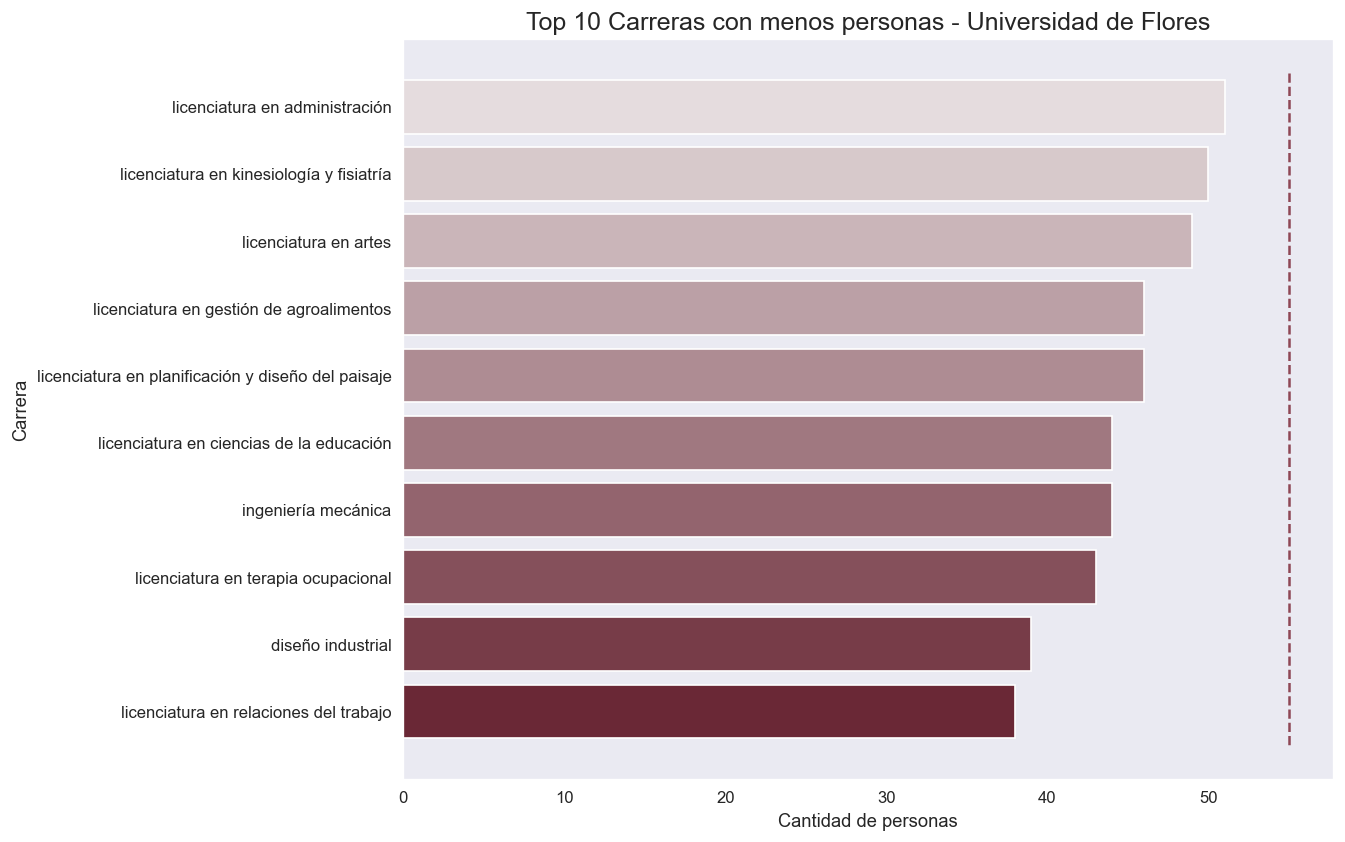

In [27]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

<AxesSubplot:xlabel='gender', ylabel='age'>

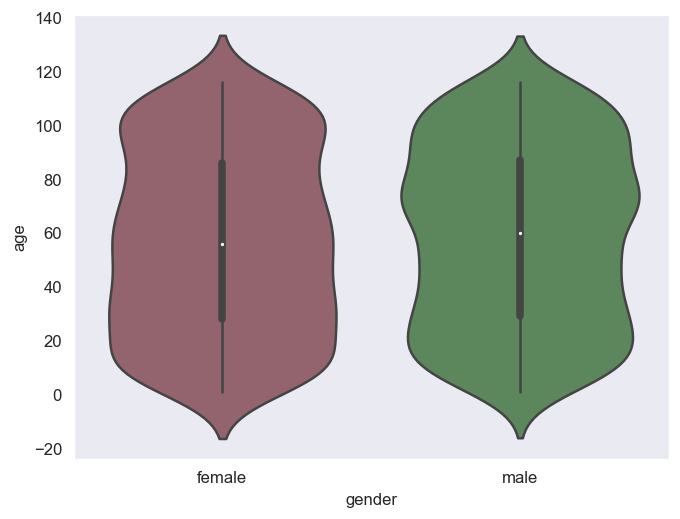

In [29]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

### top 10 localidades por alumnos

In [30]:
df_1.location.value_counts().head(10)

agua colorada       10
9 de julio           9
albarracin           7
avellaneda           6
bella vista          6
el socorro           5
los sembrados        5
emilio lamarca       5
arroyo quilla        5
colonia jauregui     5
Name: location, dtype: int64

In [31]:
df_2.location.value_counts().head(10)

bella vista           12
9 de julio             9
alto verde             8
agua negra             6
almirante brown        6
alto del saladillo     6
el durazno             6
cañada seca            6
atreuco                6
los frentones          6
Name: location, dtype: int64

### distribucion de alumnos por edad y género

<AxesSubplot:xlabel='age', ylabel='Density'>

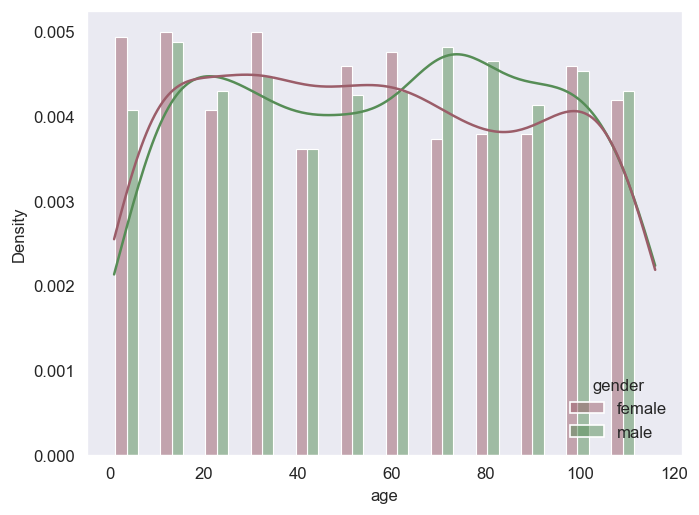

In [32]:
sns.histplot(data=df_1,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])

In [33]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)

### Segregación por tipo de carrera

In [34]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

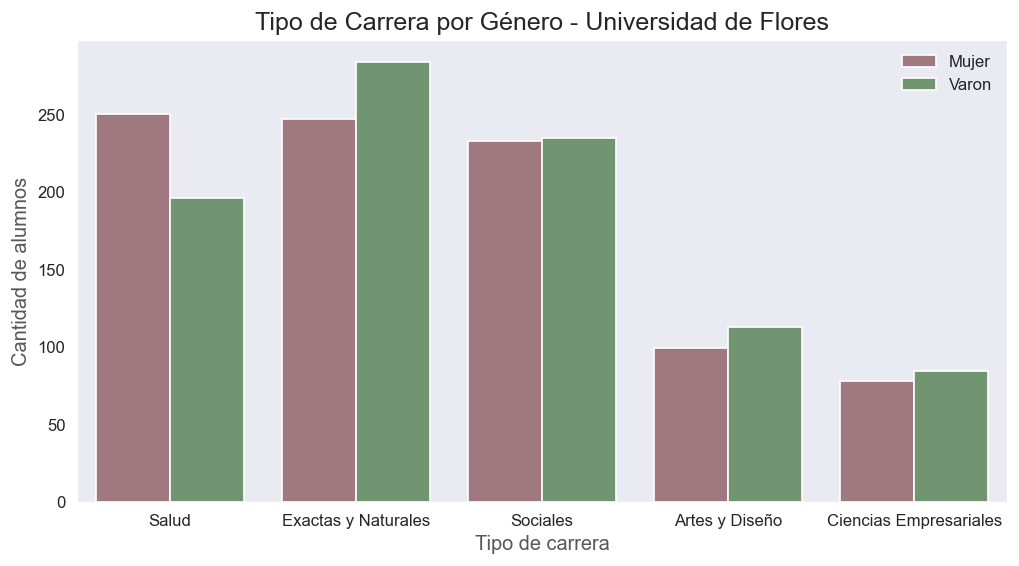

In [35]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


C:\Users\julia\AppData\Local\Temp\ipykernel_18464\628117807.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


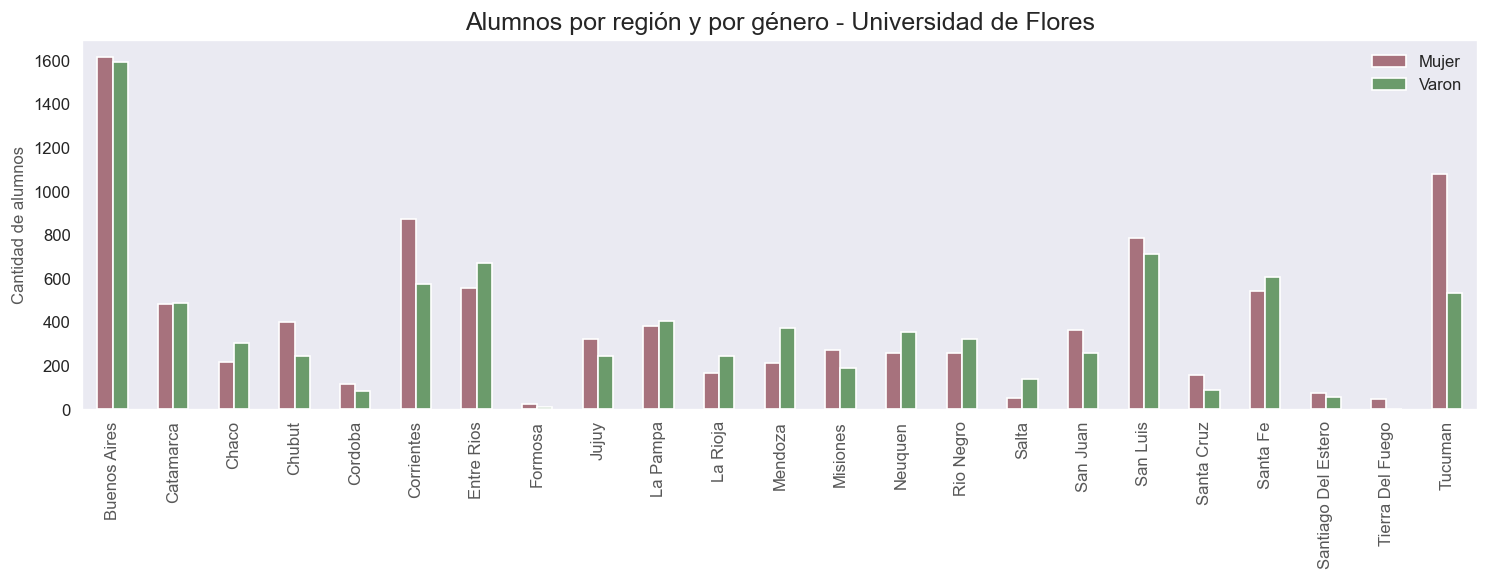

In [36]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

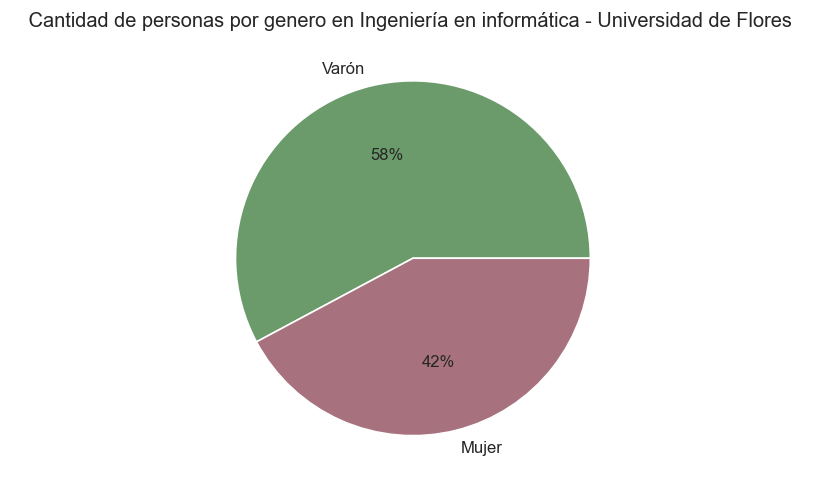

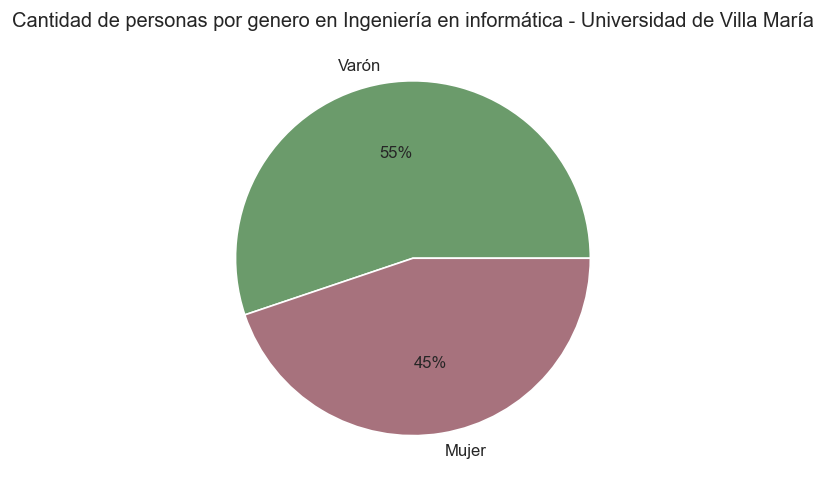

In [42]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


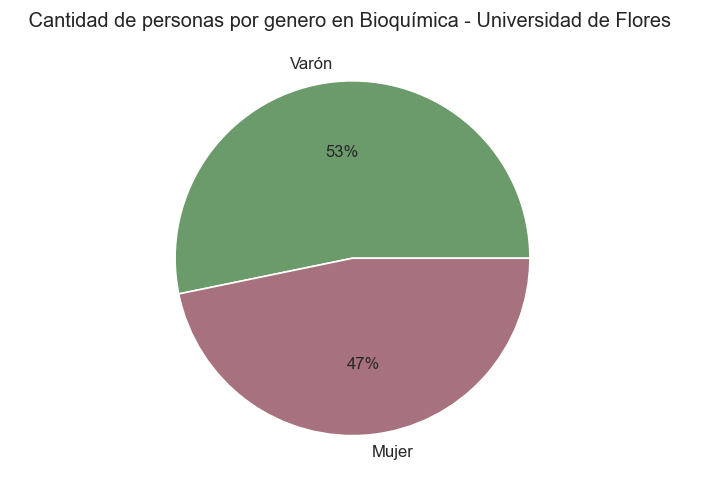

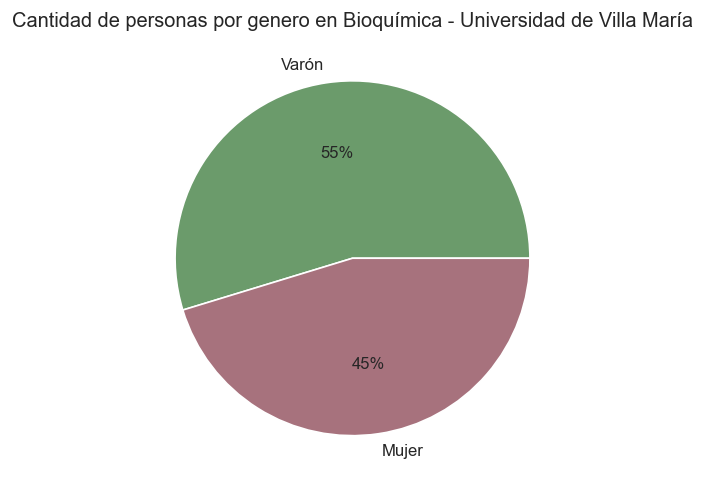

In [38]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

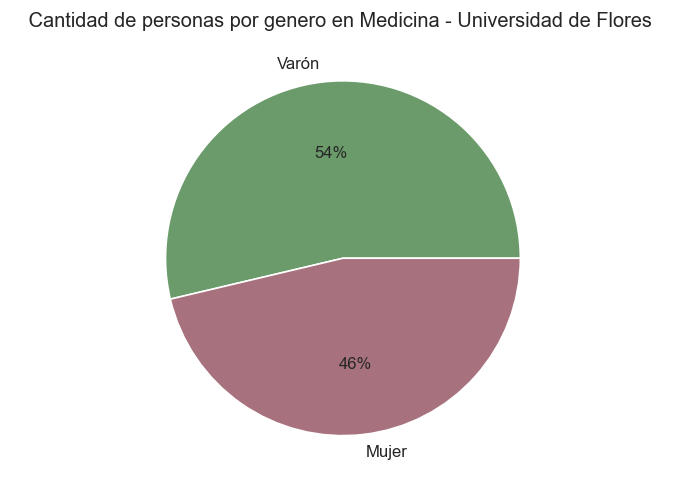

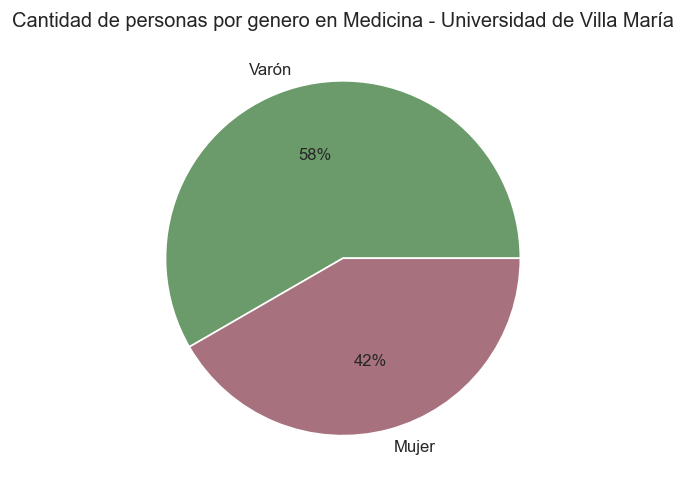

In [39]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()